# Tidyquant Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
test = pd.read_excel('ITEM_MERCH_MASTERFILE_TestData.xlsx')
sales =pd.read_excel('Sales Sample Data.xlsx')


In [3]:
test.head()


,SKU,CATEGORY,COLLECTION,LINE_UP,ENTRY_DATE,CATEGORY.1,GENDER,CASE MATERIAL,CASE COLOR,CASE SHAPE,...,DIAL TYPE,DIAL COLOR,SKU TYPE,STRAP TYPE,STRAP COLOR,ORIGINAL PRICE,PRICE RANGE,ITEM DISC,TECHNOLOGY,BRAND
0,AE1242-0103,ENTRYPRICE,FH2015,PMDOWN,2015-7,LOWLINE,MALE,SS,SLV,ROUND,...,ANALOG,SLV,6,SS,SLV,1990,1000 - 1999,0.3,3H,Brand A
1,AE1242-0903,ENTRYPRICE,SS2018,CARRYOVER,NaN,LOWLINE,MALE,SS,SLV,ROUND,...,ANALOG,SLV,2,SS,2T GLD SLV,2890,2000 - 2999,0.0,3H,Brand A
2,AE1242-1216,ENTRYPRICE,FH2015,CARRYOVER,2015-7,LOWLINE,MALE,SS,GLD,ROUND,...,ANALOG,GLD,1,SS,GLD,2890,2000 - 2999,0.0,3H,Brand A
3,AE1243-0103,ENTRYPRICE,FH2015,CARRYOVER,2015-7,LOWLINE,MALE,SS,SLV,ROUND,...,ANALOG,SLV,0,SS,SLV,1990,1000 - 1999,0.0,3H,Brand A
4,AE1243-1216,ENTRYPRICE,FH2015,CARRYOVER,2015-7,LOWLINE,MALE,SS,GLD,ROUND,...,ANALOG,GLD,0,SS,GLD,2890,2000 - 2999,0.0,3H,Brand A


In [4]:
sales.head()

,TRANS POSTED DATE,TRANS ACTUAL DATE,TRANS POSTED YEAR,TRANS POSTED MONTH,TRANS POSTED DAY,TRANS POSTED WK,TRANS ACTUAL YEAR,TRANS ACTUAL MONTH,TRANS ACTUAL DAY,TRANS ACTUAL WK,...,TRANS DOC NUMBER,LOCATION CODE,BRAND,SKU,INVOICED UNITS,CREDIT MEMO UNITS,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT,SALES ACTIVITY CODE
0,2018-06-01,2018-06-01,2018,6,1,22,2018,6,1,22,...,NTSLS-0000160330,Loc 2,Brand B,PPL.15302JSB/07M,1,0,1,8190,6552.00,REGULAR
1,2018-06-01,2018-06-01,2018,6,1,22,2018,6,1,22,...,NTSLS-0000160340,Loc 9,Brand B,PPL.14378JSR/12P,1,0,1,7490,5243.00,REGDISC
2,2018-06-01,2018-06-01,2018,6,1,22,2018,6,1,22,...,PSINV-0380308,Loc 18,Brand B,PPL.15366JS/03M,1,0,1,7290,4257.36,REGDISC
3,2018-06-06,2018-06-06,2018,6,6,23,2018,6,6,23,...,NTSLS-0000160545,Loc 9,Brand B,PPL.15001JSB/02MA,1,0,1,7590,5313.00,REGDISC
4,2018-06-09,2018-06-09,2018,6,9,23,2018,6,9,23,...,NTSLS-0000160669,Loc 9,Brand B,PPL.14834JSB/03M,1,0,1,10990,7693.00,REGDISC


### basic information about this dataframe

In [5]:
print(test.info())
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 21 columns):
SKU               1186 non-null object
CATEGORY          1186 non-null object
COLLECTION        1185 non-null object
LINE_UP           1186 non-null object
ENTRY_DATE        1058 non-null object
CATEGORY.1        1183 non-null object
GENDER            1186 non-null object
CASE MATERIAL     1184 non-null object
CASE COLOR        1184 non-null object
CASE SHAPE        1184 non-null object
CASE SIZE         1120 non-null object
DIAL TYPE         1186 non-null object
DIAL COLOR        1184 non-null object
SKU TYPE          1186 non-null int64
STRAP TYPE        1184 non-null object
STRAP COLOR       1184 non-null object
ORIGINAL PRICE    1186 non-null int64
PRICE RANGE       1186 non-null object
ITEM DISC         1186 non-null float64
TECHNOLOGY        1184 non-null object
BRAND             1186 non-null object
dtypes: float64(1), int64(2), object(18)
memory usage: 194.7+ KB
None
<clas

## Exploring and Cleaning the data for further analysis purpose


In [6]:
test.columns


Index(['SKU', 'CATEGORY', 'COLLECTION', 'LINE_UP', 'ENTRY_DATE', 'CATEGORY.1',
       'GENDER', 'CASE MATERIAL', 'CASE COLOR', 'CASE SHAPE', 'CASE SIZE',
       'DIAL TYPE', 'DIAL COLOR', 'SKU TYPE', 'STRAP TYPE', 'STRAP COLOR',
       'ORIGINAL PRICE', 'PRICE RANGE', 'ITEM DISC', 'TECHNOLOGY', 'BRAND'],
      dtype='object')

In [7]:
sales.columns

Index(['TRANS POSTED DATE', 'TRANS ACTUAL DATE', 'TRANS POSTED YEAR',
       'TRANS POSTED MONTH', 'TRANS POSTED DAY', 'TRANS POSTED WK',
       'TRANS ACTUAL YEAR', 'TRANS ACTUAL MONTH', 'TRANS ACTUAL DAY',
       'TRANS ACTUAL WK', 'TRANS TYPE', 'TRANS DOC NUMBER', 'LOCATION CODE',
       'BRAND', 'SKU', 'INVOICED UNITS', 'CREDIT MEMO UNITS',
       'NET SALES UNITS', 'UNIT PRICE', 'INVOICED AMOUNT ',
       'SALES ACTIVITY CODE'],
      dtype='object')

### Check for duplicate data

In [8]:
sum(test.duplicated())

0

In [9]:
sum(sales.duplicated())

3

In [10]:
sales.drop_duplicates(keep=False,inplace=True)
sum(sales.duplicated())

0

###  Check for outliers or any other statistical info 

In [11]:
test.describe()

,SKU TYPE,ORIGINAL PRICE,ITEM DISC
count,1186.000000,1186.000000,1186.000000
mean,7.108769,4748.178752,0.243761
std,11.335355,1951.942809,0.250196
min,0.000000,1290.000000,0.000000
25%,1.000000,3490.000000,0.000000
50%,5.000000,4290.000000,0.300000
75%,6.000000,5790.000000,0.500000
max,41.000000,16990.000000,0.700000


In [12]:
sales.describe()

,TRANS POSTED YEAR,TRANS POSTED MONTH,TRANS POSTED DAY,TRANS POSTED WK,TRANS ACTUAL YEAR,TRANS ACTUAL MONTH,TRANS ACTUAL DAY,TRANS ACTUAL WK,INVOICED UNITS,CREDIT MEMO UNITS,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT
count,14380.0,14380.000000,14380.000000,14380.000000,14380.0,14380.000000,14380.000000,14380.000000,14380.000000,14380.000000,14380.000000,14380.000000,14380.000000
mean,2018.0,9.583171,23.516620,31.900348,2018.0,9.582754,16.599166,38.996592,1.074687,-0.003060,1.071627,3109.463700,2582.565356
std,0.0,2.184951,8.558399,16.497415,0.0,2.184585,8.596145,11.112174,0.904194,0.056478,0.909579,1665.901152,1923.516347
min,2018.0,6.000000,1.000000,1.000000,2018.0,6.000000,1.000000,1.000000,-2.000000,-2.000000,-2.000000,590.000000,-6270.700000
25%,2018.0,8.000000,18.000000,26.000000,2018.0,8.000000,10.000000,30.000000,1.000000,0.000000,1.000000,1990.000000,1592.000000
50%,2018.0,10.000000,27.000000,35.000000,2018.0,10.000000,17.000000,41.000000,1.000000,0.000000,1.000000,2790.000000,2251.585000
75%,2018.0,12.000000,31.000000,46.000000,2018.0,12.000000,24.000000,49.000000,1.000000,0.000000,1.000000,3890.000000,3205.502500
max,2018.0,12.000000,31.000000,52.000000,2018.0,12.000000,31.000000,52.000000,71.000000,0.000000,71.000000,14990.000000,112890.000000


In [13]:
test.isnull().sum()

SKU                 0
CATEGORY            0
COLLECTION          1
LINE_UP             0
ENTRY_DATE        128
CATEGORY.1          3
GENDER              0
CASE MATERIAL       2
CASE COLOR          2
CASE SHAPE          2
CASE SIZE          66
DIAL TYPE           0
DIAL COLOR          2
SKU TYPE            0
STRAP TYPE          2
STRAP COLOR         2
ORIGINAL PRICE      0
PRICE RANGE         0
ITEM DISC           0
TECHNOLOGY          2
BRAND               0
dtype: int64

In [14]:
test.dropna(axis=0,inplace=True)

In [15]:
sales.isnull().sum()

TRANS POSTED DATE      0
TRANS ACTUAL DATE      0
TRANS POSTED YEAR      0
TRANS POSTED MONTH     0
TRANS POSTED DAY       0
TRANS POSTED WK        0
TRANS ACTUAL YEAR      0
TRANS ACTUAL MONTH     0
TRANS ACTUAL DAY       0
TRANS ACTUAL WK        0
TRANS TYPE             0
TRANS DOC NUMBER       0
LOCATION CODE          0
BRAND                  0
SKU                    0
INVOICED UNITS         0
CREDIT MEMO UNITS      0
NET SALES UNITS        0
UNIT PRICE             0
INVOICED AMOUNT        0
SALES ACTIVITY CODE    0
dtype: int64

In [16]:
print(test.shape)
print(sales.shape)


(991, 21)
(14380, 21)


### Merging both the dataset 

In [17]:
df_merge=pd.merge(test,sales, on='SKU')
df_merge

,SKU,CATEGORY,COLLECTION,LINE_UP,ENTRY_DATE,CATEGORY.1,GENDER,CASE MATERIAL,CASE COLOR,CASE SHAPE,...,TRANS TYPE,TRANS DOC NUMBER,LOCATION CODE,BRAND_y,INVOICED UNITS,CREDIT MEMO UNITS,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT,SALES ACTIVITY CODE
0,AE1242-0103,ENTRYPRICE,FH2015,PMDOWN,2015-7,LOWLINE,MALE,SS,SLV,ROUND,...,SI-ITEMS,PSINV-0383354,Loc 3,Brand A,1,0,1,1890,1305.80,SP20
1,AE1242-0103,ENTRYPRICE,FH2015,PMDOWN,2015-7,LOWLINE,MALE,SS,SLV,ROUND,...,SI-ITEMS,NTSLS-0000168915,Loc 9,Brand A,1,0,1,1350,1350.00,MYS2013
2,AE1242-0103,ENTRYPRICE,FH2015,PMDOWN,2015-7,LOWLINE,MALE,SS,SLV,ROUND,...,SI-ITEMS,NTSLS-0000169076,Loc 9,Brand A,1,0,1,1350,1350.00,MYSMB
3,AE1242-1216,ENTRYPRICE,FH2015,CARRYOVER,2015-7,LOWLINE,MALE,SS,GLD,ROUND,...,SI-ITEMS,PSINV-0380336,Loc 6,Brand A,1,0,1,2890,2072.28,REGULAR
4,AE1242-1216,ENTRYPRICE,FH2015,CARRYOVER,2015-7,LOWLINE,MALE,SS,GLD,ROUND,...,SI-ITEMS,PSINV-0386141,Loc 19,Brand A,1,0,1,2890,1771.91,REGDISC
5,AE1242-1216,ENTRYPRICE,FH2015,CARRYOVER,2015-7,LOWLINE,MALE,SS,GLD,ROUND,...,SI-ITEMS,PSINV-0387882,Loc 18,Brand A,1,0,1,2890,1687.76,REGDISC
6,AE1242-1216,ENTRYPRICE,FH2015,CARRYOVER,2015-7,LOWLINE,MALE,SS,GLD,ROUND,...,SI-ITEMS,PSINV-0389900,Loc 4,Brand A,1,0,1,2890,1797.32,REGDISC
7,AE1242-1216,ENTRYPRICE,FH2015,CARRYOVER,2015-7,LOWLINE,MALE,SS,GLD,ROUND,...,SI-ITEMS,PSINV-0394740,Loc 6,Brand A,1,0,1,2890,1965.20,MYSREG
8,AE1242-1216,ENTRYPRICE,FH2015,CARRYOVER,2015-7,LOWLINE,MALE,SS,GLD,ROUND,...,SI-ITEMS,PSINV-0392736,Loc 4,Brand A,1,0,1,2890,1881.72,REGDISC
9,AE1242-1216,ENTRYPRICE,FH2015,CARRYOVER,2015-7,LOWLINE,MALE,SS,GLD,ROUND,...,SI-ITEMS,PSINV-0393179,Loc 10,Brand A,1,0,1,2890,1965.20,REGDISC


In [18]:
df_merge.shape

(12883, 41)

In [19]:
sum(df_merge['SKU'].duplicated())

11892

In [20]:
df_merge['SKU'].drop_duplicates(keep=False,inplace=True)

In [21]:
sum(df_merge['SKU'].duplicated())

0

In [22]:
df_merge.columns


Index(['SKU', 'CATEGORY', 'COLLECTION', 'LINE_UP', 'ENTRY_DATE', 'CATEGORY.1',
       'GENDER', 'CASE MATERIAL', 'CASE COLOR', 'CASE SHAPE', 'CASE SIZE',
       'DIAL TYPE', 'DIAL COLOR', 'SKU TYPE', 'STRAP TYPE', 'STRAP COLOR',
       'ORIGINAL PRICE', 'PRICE RANGE', 'ITEM DISC', 'TECHNOLOGY', 'BRAND_x',
       'TRANS POSTED DATE', 'TRANS ACTUAL DATE', 'TRANS POSTED YEAR',
       'TRANS POSTED MONTH', 'TRANS POSTED DAY', 'TRANS POSTED WK',
       'TRANS ACTUAL YEAR', 'TRANS ACTUAL MONTH', 'TRANS ACTUAL DAY',
       'TRANS ACTUAL WK', 'TRANS TYPE', 'TRANS DOC NUMBER', 'LOCATION CODE',
       'BRAND_y', 'INVOICED UNITS', 'CREDIT MEMO UNITS', 'NET SALES UNITS',
       'UNIT PRICE', 'INVOICED AMOUNT ', 'SALES ACTIVITY CODE'],
      dtype='object')

In [23]:
df_merge.describe()

,SKU TYPE,ORIGINAL PRICE,ITEM DISC,TRANS POSTED YEAR,TRANS POSTED MONTH,TRANS POSTED DAY,TRANS POSTED WK,TRANS ACTUAL YEAR,TRANS ACTUAL MONTH,TRANS ACTUAL DAY,TRANS ACTUAL WK,INVOICED UNITS,CREDIT MEMO UNITS,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT
count,12883.000000,12883.000000,12883.000000,12883.0,12883.000000,12883.000000,12883.000000,12883.0,12883.000000,12883.000000,12883.000000,12883.000000,12883.000000,12883.000000,12883.000000,12883.000000
mean,9.648995,4177.836684,0.274602,2018.0,9.561826,23.466894,31.877901,2018.0,9.561670,16.586665,38.874175,1.076380,-0.002872,1.073508,3095.691687,2594.083971
std,15.625018,1328.803359,0.243390,0.0,2.188017,8.556009,16.430663,0.0,2.187879,8.603859,11.151568,0.939352,0.053516,0.944155,1623.657761,1959.133017
min,0.000000,1290.000000,0.000000,2018.0,6.000000,1.000000,1.000000,2018.0,6.000000,1.000000,1.000000,-2.000000,-1.000000,-2.000000,590.000000,-5382.000000
25%,1.000000,3590.000000,0.000000,2018.0,8.000000,18.000000,26.000000,2018.0,8.000000,10.000000,30.000000,1.000000,0.000000,1.000000,1990.000000,1601.365000
50%,1.000000,4290.000000,0.300000,2018.0,10.000000,27.000000,35.000000,2018.0,10.000000,17.000000,40.000000,1.000000,0.000000,1.000000,2790.000000,2261.100000
75%,6.000000,4490.000000,0.500000,2018.0,12.000000,31.000000,46.000000,2018.0,12.000000,24.000000,49.000000,1.000000,0.000000,1.000000,3890.000000,3217.500000
max,41.000000,16990.000000,0.700000,2018.0,12.000000,31.000000,52.000000,2018.0,12.000000,31.000000,52.000000,71.000000,0.000000,71.000000,14990.000000,112890.000000


# Exploratory Data Analysis

#### The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables

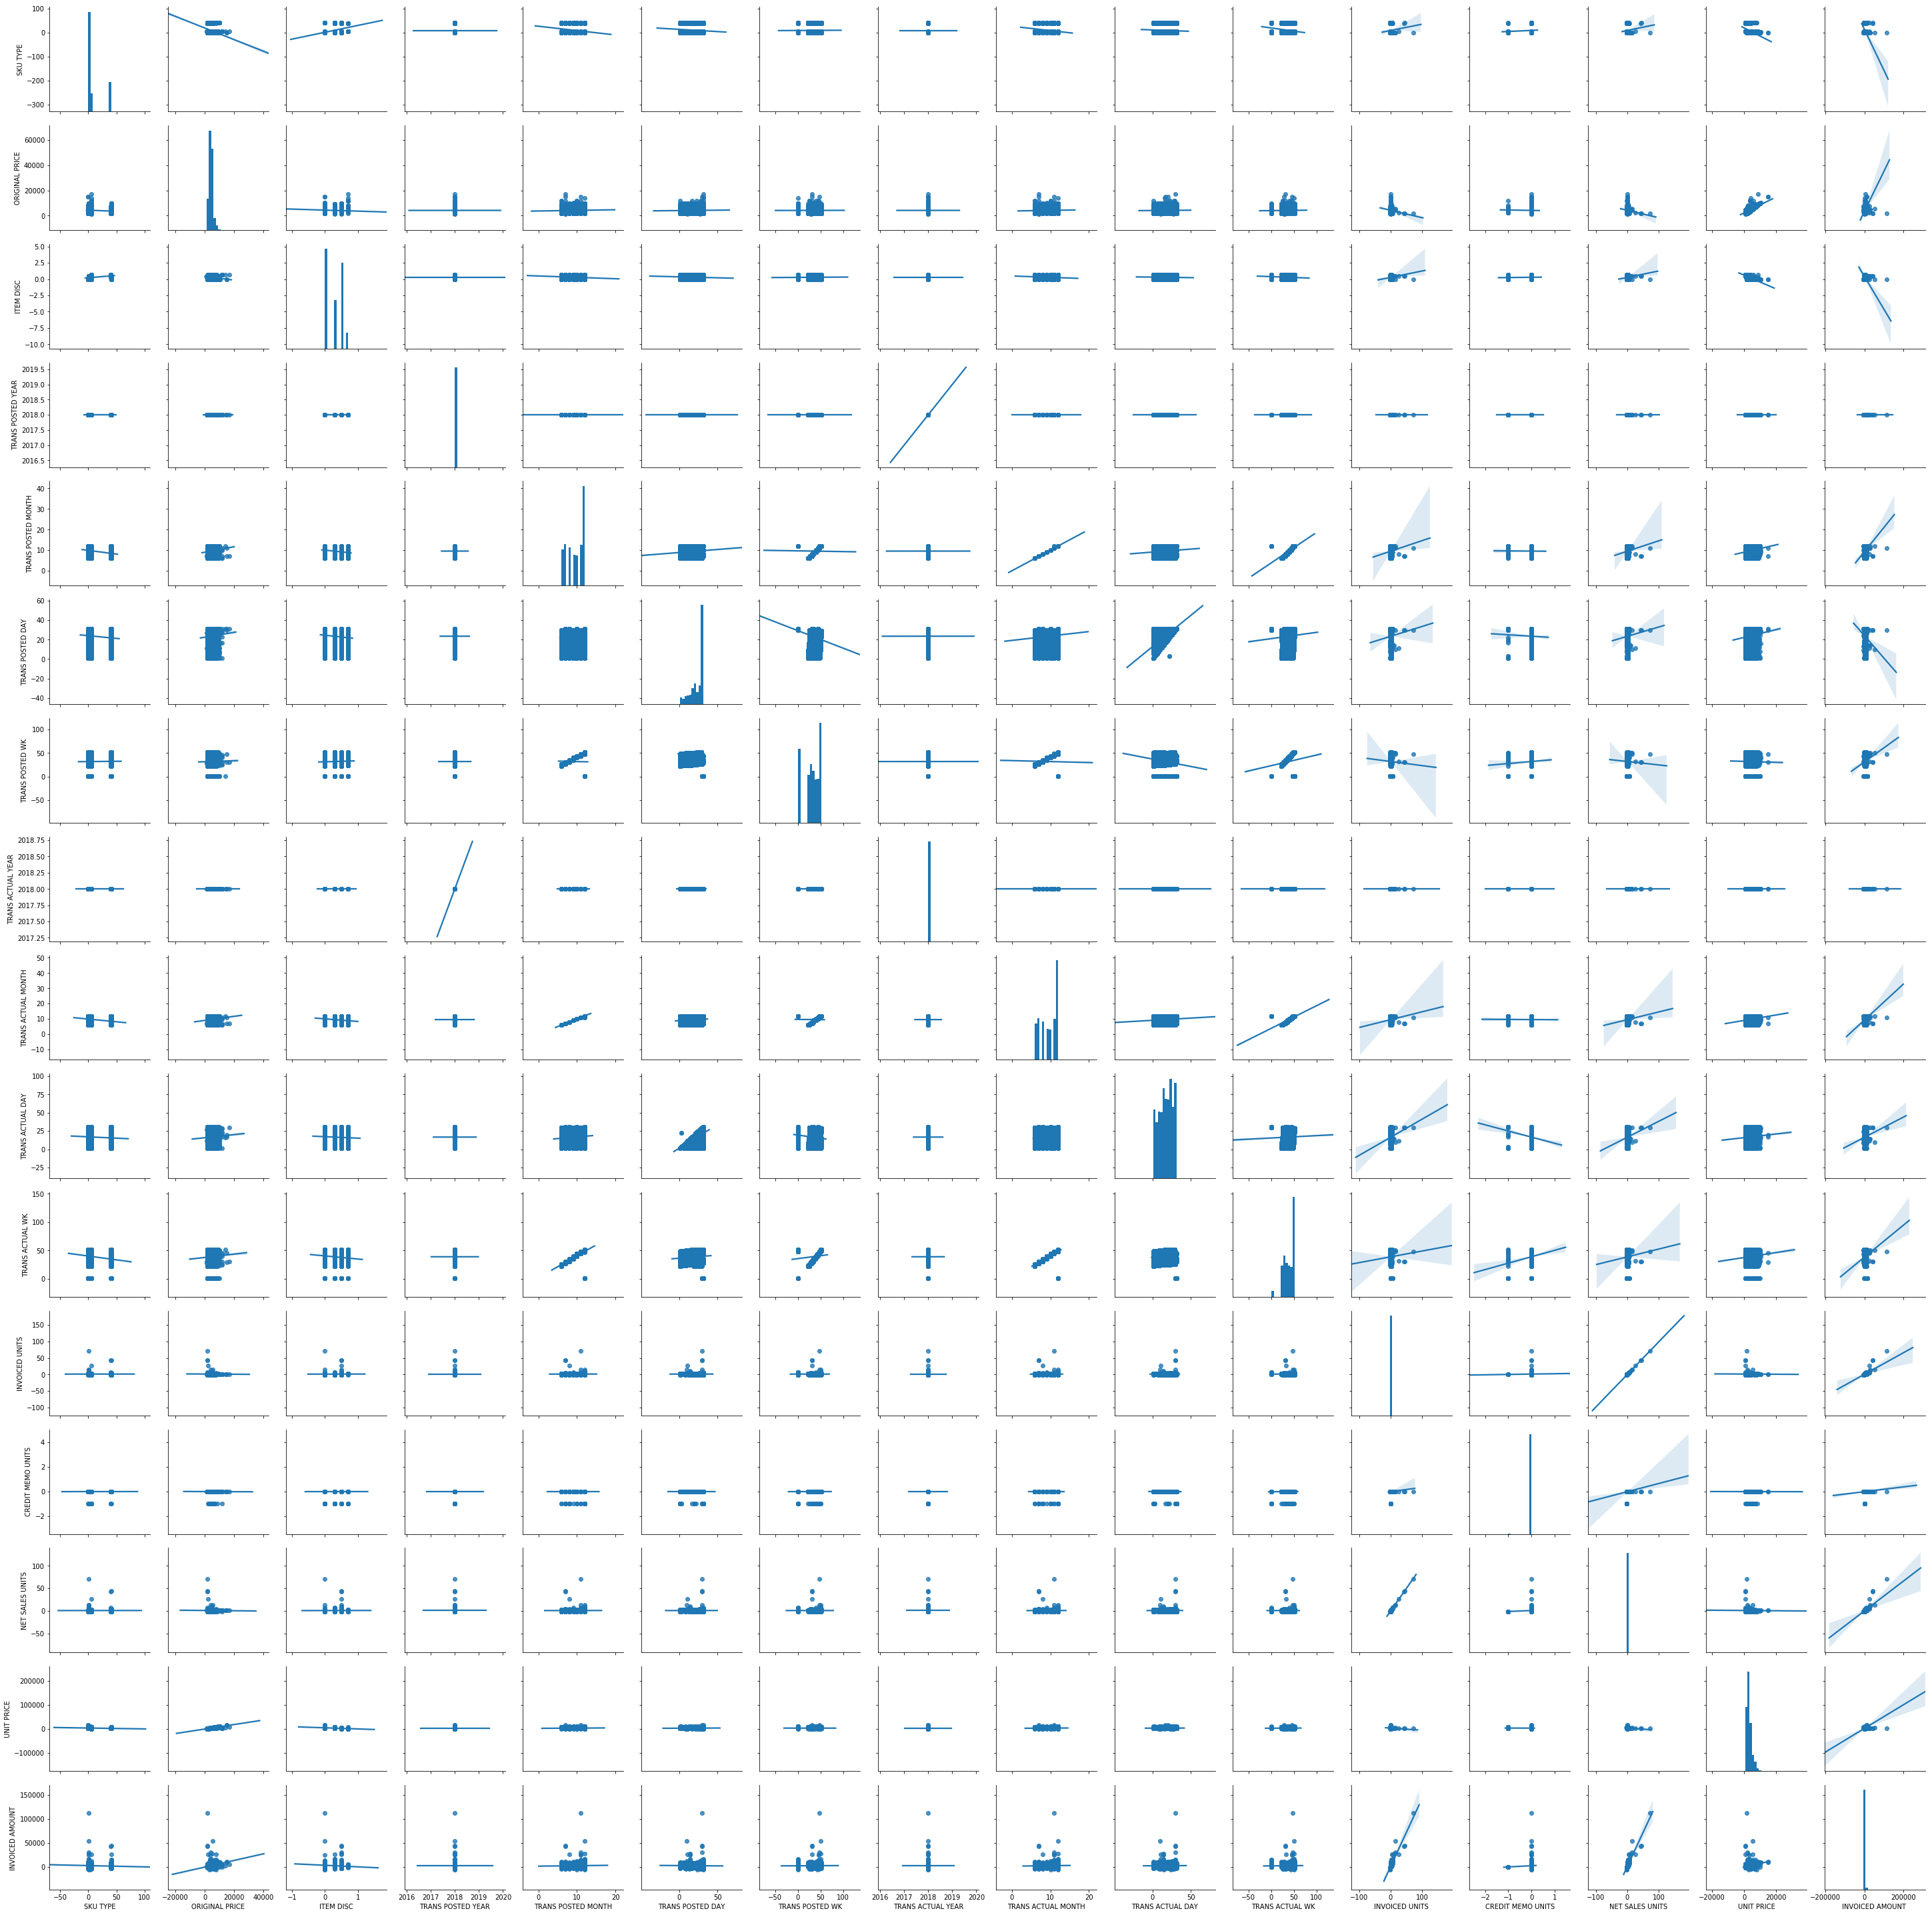

In [25]:
import seaborn as sns

sns.pairplot(df_merge, kind = "reg")

### Understand co-relation between variables

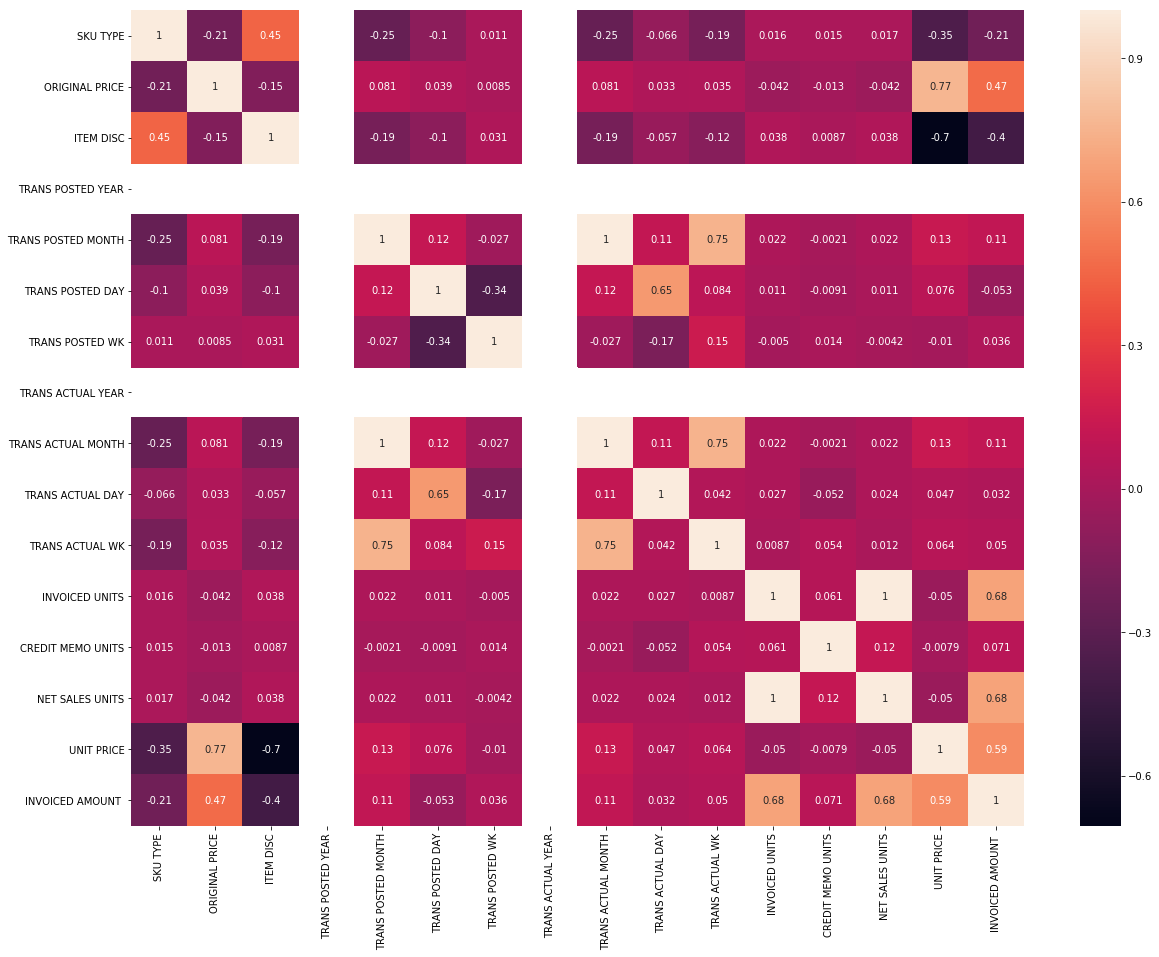

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df_merge.corr(), annot=True)
#Most of the coloumns here do not share any correlation as shown in earlier plots.

### storing the merge file into 'merge1.xlsx' after cleaning for future analysis

In [27]:
df_merge.to_excel('merge1.xlsx', index = False)


In [28]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12883 entries, 0 to 12882
Data columns (total 41 columns):
SKU                    12883 non-null object
CATEGORY               12883 non-null object
COLLECTION             12883 non-null object
LINE_UP                12883 non-null object
ENTRY_DATE             12883 non-null object
CATEGORY.1             12883 non-null object
GENDER                 12883 non-null object
CASE MATERIAL          12883 non-null object
CASE COLOR             12883 non-null object
CASE SHAPE             12883 non-null object
CASE SIZE              12883 non-null object
DIAL TYPE              12883 non-null object
DIAL COLOR             12883 non-null object
SKU TYPE               12883 non-null int64
STRAP TYPE             12883 non-null object
STRAP COLOR            12883 non-null object
ORIGINAL PRICE         12883 non-null int64
PRICE RANGE            12883 non-null object
ITEM DISC              12883 non-null float64
TECHNOLOGY             12883 non-null

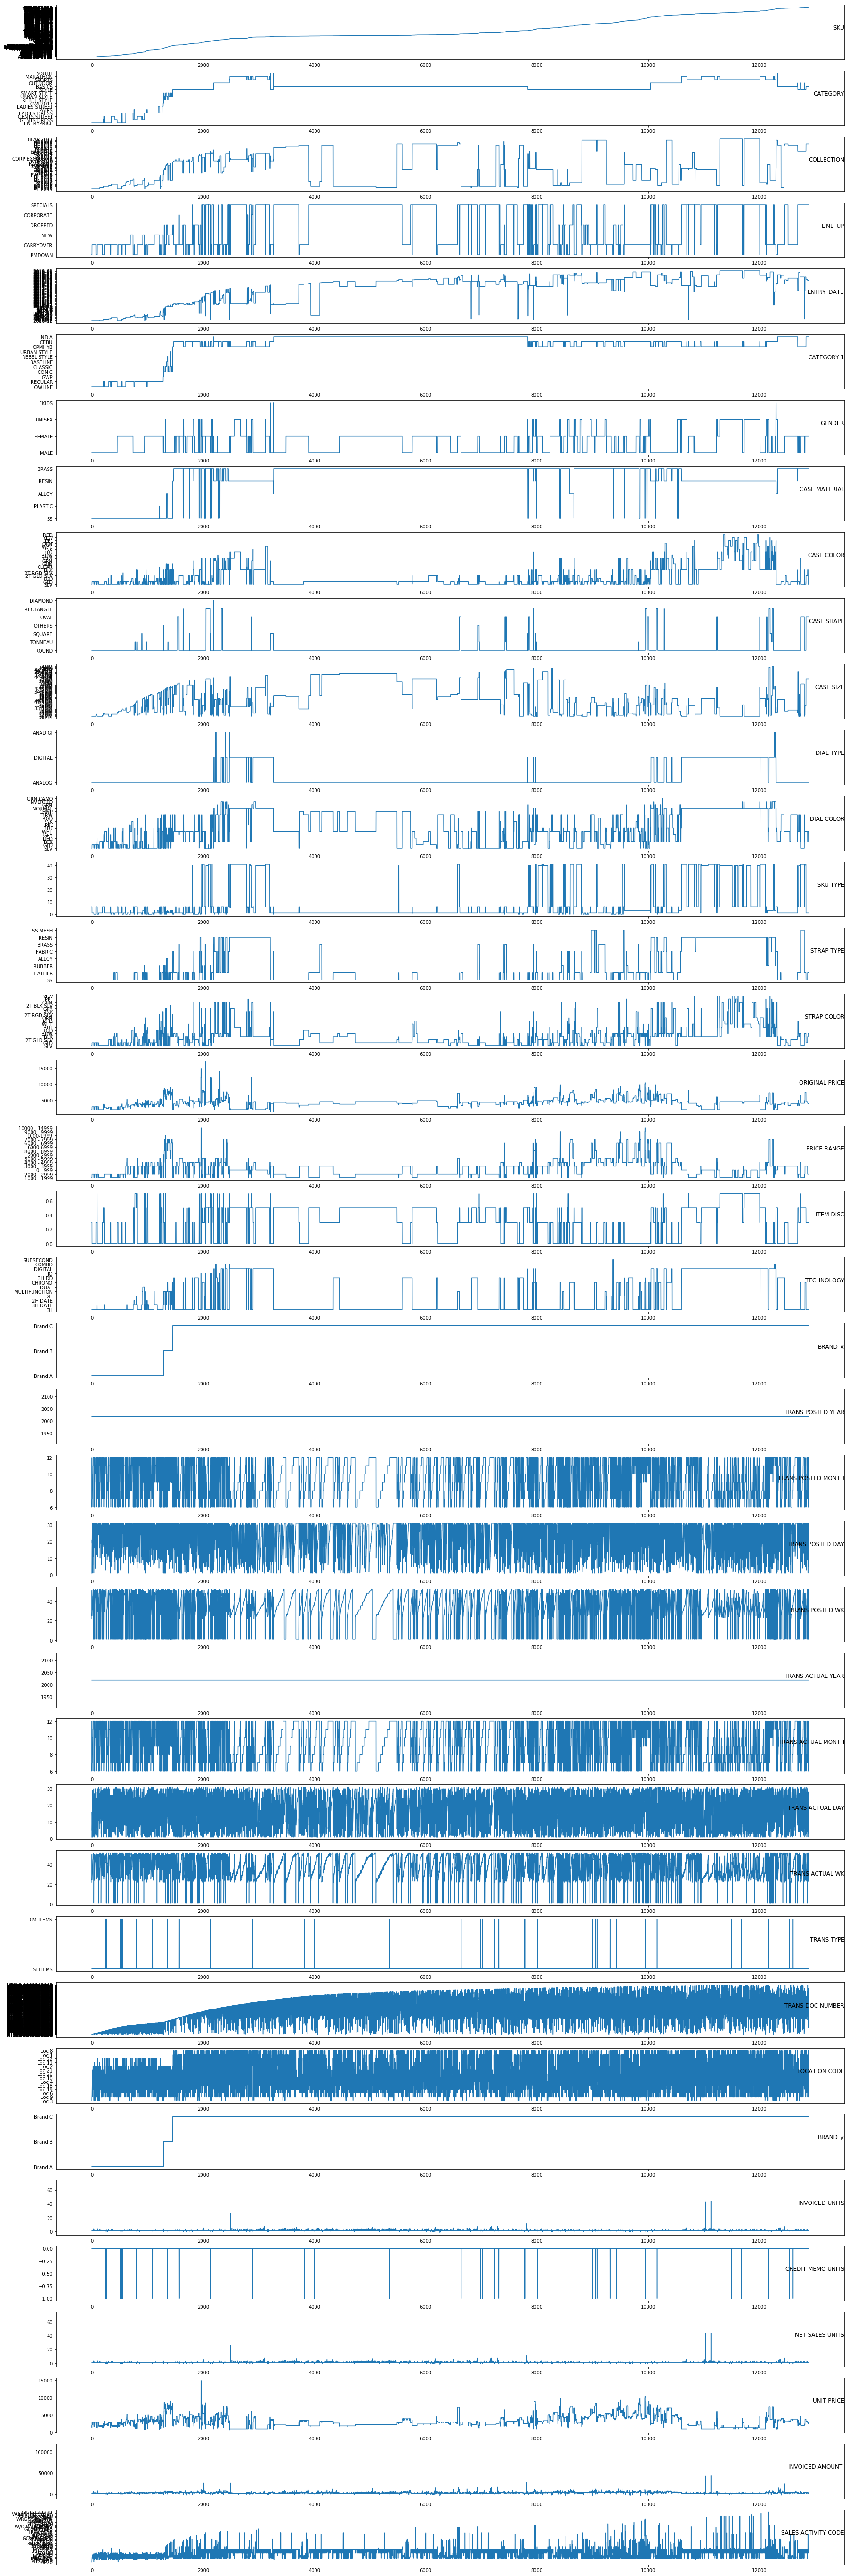

In [29]:
plt.figure(figsize=(30,100))

showList = [x for x in df_merge.columns if x not in ['TRANS POSTED DATE', 'TRANS ACTUAL DATE']]

for i, col in enumerate(showList, start=1):
    plt.subplot(len(showList), 1, i)
    plt.plot(df_merge.index, df_merge[col].values)
    plt.title(col, y=0.5, loc='right')
plt.show()

In [30]:
df_merge.columns

Index(['SKU', 'CATEGORY', 'COLLECTION', 'LINE_UP', 'ENTRY_DATE', 'CATEGORY.1',
       'GENDER', 'CASE MATERIAL', 'CASE COLOR', 'CASE SHAPE', 'CASE SIZE',
       'DIAL TYPE', 'DIAL COLOR', 'SKU TYPE', 'STRAP TYPE', 'STRAP COLOR',
       'ORIGINAL PRICE', 'PRICE RANGE', 'ITEM DISC', 'TECHNOLOGY', 'BRAND_x',
       'TRANS POSTED DATE', 'TRANS ACTUAL DATE', 'TRANS POSTED YEAR',
       'TRANS POSTED MONTH', 'TRANS POSTED DAY', 'TRANS POSTED WK',
       'TRANS ACTUAL YEAR', 'TRANS ACTUAL MONTH', 'TRANS ACTUAL DAY',
       'TRANS ACTUAL WK', 'TRANS TYPE', 'TRANS DOC NUMBER', 'LOCATION CODE',
       'BRAND_y', 'INVOICED UNITS', 'CREDIT MEMO UNITS', 'NET SALES UNITS',
       'UNIT PRICE', 'INVOICED AMOUNT ', 'SALES ACTIVITY CODE'],
      dtype='object')

In [31]:
df_merge.dtypes

SKU                            object
CATEGORY                       object
COLLECTION                     object
LINE_UP                        object
ENTRY_DATE                     object
CATEGORY.1                     object
GENDER                         object
CASE MATERIAL                  object
CASE COLOR                     object
CASE SHAPE                     object
CASE SIZE                      object
DIAL TYPE                      object
DIAL COLOR                     object
SKU TYPE                        int64
STRAP TYPE                     object
STRAP COLOR                    object
ORIGINAL PRICE                  int64
PRICE RANGE                    object
ITEM DISC                     float64
TECHNOLOGY                     object
BRAND_x                        object
TRANS POSTED DATE      datetime64[ns]
TRANS ACTUAL DATE      datetime64[ns]
TRANS POSTED YEAR               int64
TRANS POSTED MONTH              int64
TRANS POSTED DAY                int64
TRANS POSTED

## Density Plots 

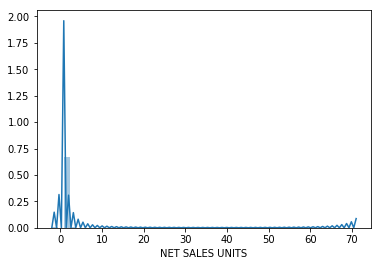

In [32]:
sns.distplot(df_merge['NET SALES UNITS'], kde=True)
#Has sharper peak at 0. Elongates to right.

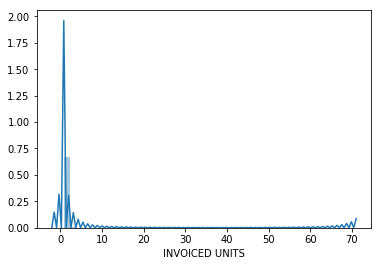

In [33]:
sns.distplot(df_merge['INVOICED UNITS'], kde=True)
#Similar to Net Sales Units Graph.Has sharper peak at 0. Elongates to right.


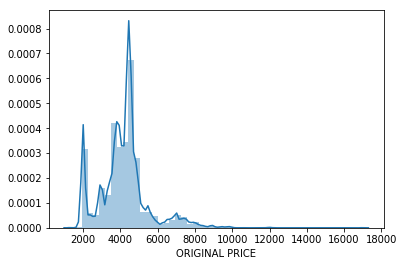

In [34]:
sns.distplot(df_merge['ORIGINAL PRICE'], kde=True)
#Has a sharper peak at 5000

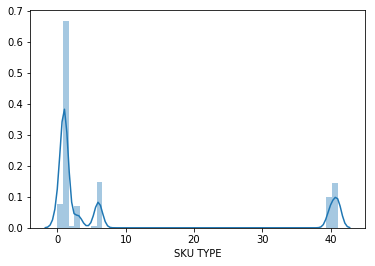

In [35]:
sns.distplot(df_merge['SKU TYPE'], kde=True)

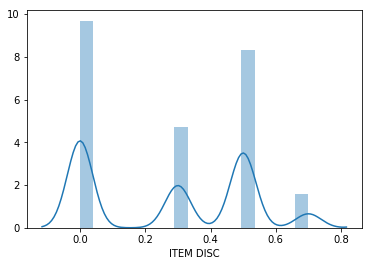

In [36]:
sns.distplot(df_merge['ITEM DISC'], kde=True)
#Linked normal curves from 0.0 to 0.5. 0.7 is outlier. 0.3 does not peak enough to be normal curve.

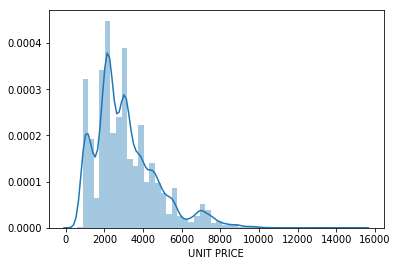

In [37]:
sns.distplot(df_merge['UNIT PRICE'], kde=True)
#Resembles normal curve. Peaks around 2500. Elongates to Right

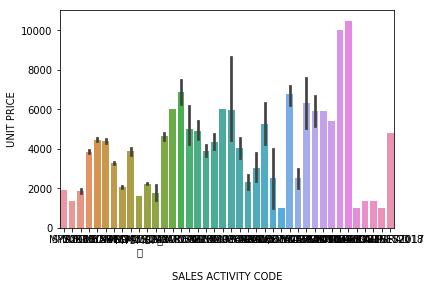

In [38]:
sns.barplot(y="UNIT PRICE", x="SALES ACTIVITY CODE", data=df_merge)
# Plot shows Sales Activity code at various Unit Price

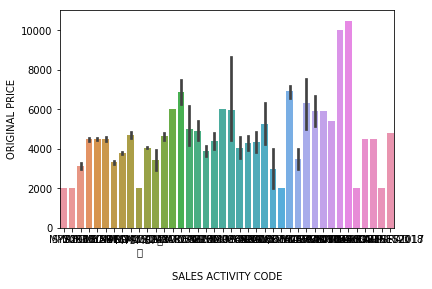

In [39]:
sns.barplot(y="ORIGINAL PRICE", x="SALES ACTIVITY CODE", data=df_merge)
# Plot shows Sales Activity code at various original Price


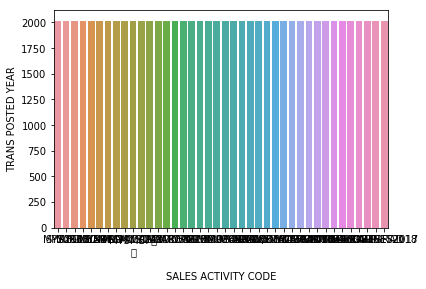

In [40]:
sns.barplot(y="TRANS POSTED YEAR", x="SALES ACTIVITY CODE", data=df_merge)
#Plot shows Sales Activity code at various TRANS POSTED YEAR


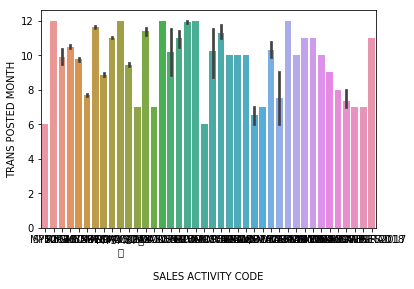

In [41]:
sns.barplot(y="TRANS POSTED MONTH", x="SALES ACTIVITY CODE", data=df_merge)
#Plot shows Sales Activity code at various TRANS POSTED MONTH


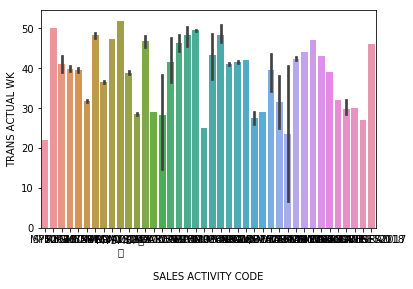

In [42]:
sns.barplot(y="TRANS ACTUAL WK", x="SALES ACTIVITY CODE", data=df_merge)
#Plot shows Sales Activity code at various TRANS ACTUAL WK

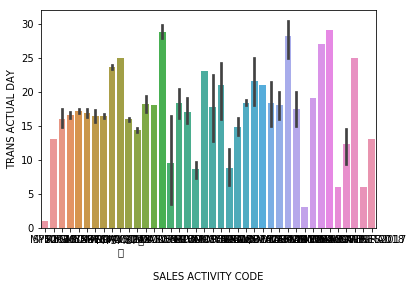

In [43]:
sns.barplot(y="TRANS ACTUAL DAY", x="SALES ACTIVITY CODE", data=df_merge)
#Plot shows Sales Activity code at various TRANS ACTUAL DAY

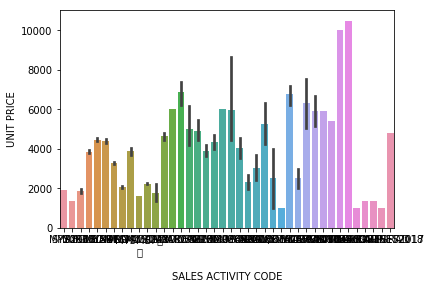

In [44]:
sns.barplot(y="UNIT PRICE", x="SALES ACTIVITY CODE", data=df_merge)
#Plot shows Sales Activity code at various UNIT PRICE

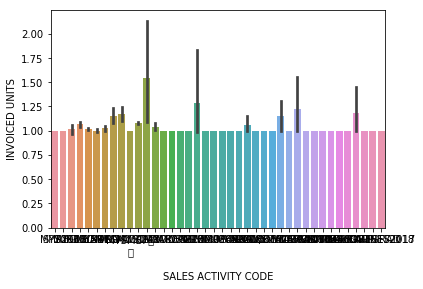

In [45]:
sns.barplot(y="INVOICED UNITS", x="SALES ACTIVITY CODE", data=df_merge)
#Plot shows Sales Activity code at various INVOICED UNITS

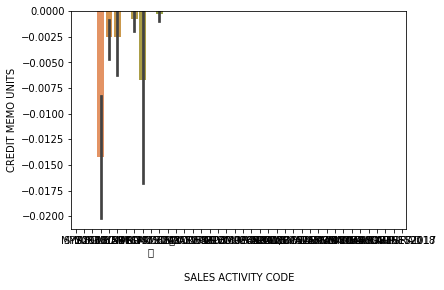

In [46]:
sns.barplot(y="CREDIT MEMO UNITS", x="SALES ACTIVITY CODE", data=df_merge)
#Plot shows Sales Activity code at various CREDIT MEMO UNITS

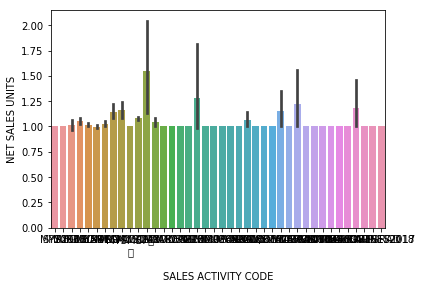

In [47]:
sns.barplot(y="NET SALES UNITS", x="SALES ACTIVITY CODE", data=df_merge)
#Plot shows Sales Activity code at various NET SALES UNITS


In [48]:
df_merge.dtypes

SKU                            object
CATEGORY                       object
COLLECTION                     object
LINE_UP                        object
ENTRY_DATE                     object
CATEGORY.1                     object
GENDER                         object
CASE MATERIAL                  object
CASE COLOR                     object
CASE SHAPE                     object
CASE SIZE                      object
DIAL TYPE                      object
DIAL COLOR                     object
SKU TYPE                        int64
STRAP TYPE                     object
STRAP COLOR                    object
ORIGINAL PRICE                  int64
PRICE RANGE                    object
ITEM DISC                     float64
TECHNOLOGY                     object
BRAND_x                        object
TRANS POSTED DATE      datetime64[ns]
TRANS ACTUAL DATE      datetime64[ns]
TRANS POSTED YEAR               int64
TRANS POSTED MONTH              int64
TRANS POSTED DAY                int64
TRANS POSTED

In [49]:
df_merge.head()

,SKU,CATEGORY,COLLECTION,LINE_UP,ENTRY_DATE,CATEGORY.1,GENDER,CASE MATERIAL,CASE COLOR,CASE SHAPE,...,TRANS TYPE,TRANS DOC NUMBER,LOCATION CODE,BRAND_y,INVOICED UNITS,CREDIT MEMO UNITS,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT,SALES ACTIVITY CODE
0,AE1242-0103,ENTRYPRICE,FH2015,PMDOWN,2015-7,LOWLINE,MALE,SS,SLV,ROUND,...,SI-ITEMS,PSINV-0383354,Loc 3,Brand A,1,0,1,1890,1305.80,SP20
1,AE1242-0103,ENTRYPRICE,FH2015,PMDOWN,2015-7,LOWLINE,MALE,SS,SLV,ROUND,...,SI-ITEMS,NTSLS-0000168915,Loc 9,Brand A,1,0,1,1350,1350.00,MYS2013
2,AE1242-0103,ENTRYPRICE,FH2015,PMDOWN,2015-7,LOWLINE,MALE,SS,SLV,ROUND,...,SI-ITEMS,NTSLS-0000169076,Loc 9,Brand A,1,0,1,1350,1350.00,MYSMB
3,AE1242-1216,ENTRYPRICE,FH2015,CARRYOVER,2015-7,LOWLINE,MALE,SS,GLD,ROUND,...,SI-ITEMS,PSINV-0380336,Loc 6,Brand A,1,0,1,2890,2072.28,REGULAR
4,AE1242-1216,ENTRYPRICE,FH2015,CARRYOVER,2015-7,LOWLINE,MALE,SS,GLD,ROUND,...,SI-ITEMS,PSINV-0386141,Loc 19,Brand A,1,0,1,2890,1771.91,REGDISC


# Finding the Clusters in each Brand

## K- Means


In [50]:
df1=df_merge.drop(['SKU','CATEGORY','COLLECTION','LINE_UP','CATEGORY.1','GENDER','CASE MATERIAL','CASE COLOR',
               'CASE SHAPE','TRANS TYPE','CASE SIZE','DIAL TYPE','DIAL COLOR','STRAP TYPE','STRAP COLOR','TECHNOLOGY',
               'TRANS POSTED DATE','SALES ACTIVITY CODE','TRANS DOC NUMBER','LOCATION CODE','BRAND_y','ENTRY_DATE','ITEM DISC',
                'PRICE RANGE','TRANS ACTUAL DATE','SKU TYPE','TRANS POSTED YEAR','TRANS POSTED MONTH','TRANS POSTED DAY'
                   ,'TRANS POSTED WK','TRANS ACTUAL YEAR','TRANS ACTUAL MONTH','TRANS ACTUAL DAY','TRANS ACTUAL WK'
                   ,'INVOICED UNITS','CREDIT MEMO UNITS','NET SALES UNITS'], axis=1)

In [51]:
df1.head()


,ORIGINAL PRICE,BRAND_x,UNIT PRICE,INVOICED AMOUNT
0,1990,Brand A,1890,1305.80
1,1990,Brand A,1350,1350.00
2,1990,Brand A,1350,1350.00
3,2890,Brand A,2890,2072.28
4,2890,Brand A,2890,1771.91


In [52]:
df1.dtypes

ORIGINAL PRICE        int64
BRAND_x              object
UNIT PRICE            int64
INVOICED AMOUNT     float64
dtype: object

In [53]:
df1.columns= df1.columns.str.replace(' ','')

In [54]:
df1.head()

,ORIGINALPRICE,BRAND_x,UNITPRICE,INVOICEDAMOUNT
0,1990,Brand A,1890,1305.80
1,1990,Brand A,1350,1350.00
2,1990,Brand A,1350,1350.00
3,2890,Brand A,2890,2072.28
4,2890,Brand A,2890,1771.91


In [55]:
df1["BRAND_x"].head(5)

0    Brand A
1    Brand A
2    Brand A
3    Brand A
4    Brand A
Name: BRAND_x, dtype: object

In [56]:
df1["BRAND_x"].groupby(df1["BRAND_x"],axis=0).count()

BRAND_x
Brand A     1289
Brand B      164
Brand C    11430
Name: BRAND_x, dtype: int64

### Dataset distribution for each brand are-- BRAND1 :- Brand A, BRAND2:-Brand B, BRAND3:-Brand3

In [57]:
BRAND1=df1.iloc[:1289,:]
BRAND1.head()

,ORIGINALPRICE,BRAND_x,UNITPRICE,INVOICEDAMOUNT
0,1990,Brand A,1890,1305.80
1,1990,Brand A,1350,1350.00
2,1990,Brand A,1350,1350.00
3,2890,Brand A,2890,2072.28
4,2890,Brand A,2890,1771.91


In [58]:
BRAND1_feature=BRAND1.loc[:, BRAND1.columns != 'BRAND_x']
BRAND1_feature.head()

,ORIGINALPRICE,UNITPRICE,INVOICEDAMOUNT
0,1990,1890,1305.80
1,1990,1350,1350.00
2,1990,1350,1350.00
3,2890,2890,2072.28
4,2890,2890,1771.91


In [59]:
BRAND1_targ = BRAND1['BRAND_x']
BRAND1_targ.head()

0    Brand A
1    Brand A
2    Brand A
3    Brand A
4    Brand A
Name: BRAND_x, dtype: object

In [60]:
BRAND1.head()

,ORIGINALPRICE,BRAND_x,UNITPRICE,INVOICEDAMOUNT
0,1990,Brand A,1890,1305.80
1,1990,Brand A,1350,1350.00
2,1990,Brand A,1350,1350.00
3,2890,Brand A,2890,2072.28
4,2890,Brand A,2890,1771.91


In [61]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

### Elbow Plot 

In [62]:
sse = []
k_rng = range(1,5)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(BRAND1_feature)
    sse.append(km.inertia_)

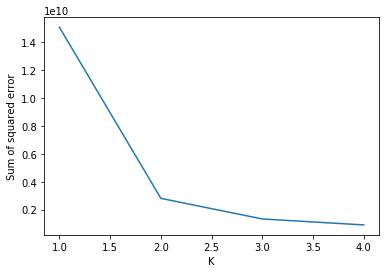

In [63]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### Preprocessing using min max scaler

In [64]:
scaler = MinMaxScaler()

scaler.fit(BRAND1[['ORIGINALPRICE']])
BRAND1['ORIGINALPRICE'] = scaler.transform(BRAND1[['ORIGINALPRICE']])

scaler.fit(BRAND1[['UNITPRICE']])
BRAND1['UNITPRICE'] = scaler.transform(BRAND1[['UNITPRICE']])

scaler.fit(BRAND1[['INVOICEDAMOUNT']])
BRAND1['INVOICEDAMOUNT'] = scaler.transform(BRAND1[['INVOICEDAMOUNT']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [65]:
BRAND1.head()

,ORIGINALPRICE,BRAND_x,UNITPRICE,INVOICEDAMOUNT
0,0.028571,Brand A,0.242762,0.035212
1,0.028571,Brand A,0.122494,0.035594
2,0.028571,Brand A,0.122494,0.035594
3,0.285714,Brand A,0.465479,0.041839
4,0.285714,Brand A,0.465479,0.039242


In [66]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(BRAND1_feature)
y_predicted

array([2, 2, 2, ..., 2, 2, 2])

In [67]:
BRAND1['cluster']=y_predicted
BRAND1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ORIGINALPRICE,BRAND_x,UNITPRICE,INVOICEDAMOUNT,cluster
0,0.028571,Brand A,0.242762,0.035212,2
1,0.028571,Brand A,0.122494,0.035594,2
2,0.028571,Brand A,0.122494,0.035594,2
3,0.285714,Brand A,0.465479,0.041839,2
4,0.285714,Brand A,0.465479,0.039242,2


In [68]:
km.cluster_centers_

array([[  3788.74213836,   3689.82180294,   2862.30777778],
       [  1990.        ,   1590.        , 112890.        ],
       [  2685.19112207,   2207.71270037,   1635.71598027]])

In [69]:
df1["BRAND_x"].groupby(df1["BRAND_x"],axis=0).count()

BRAND_x
Brand A     1289
Brand B      164
Brand C    11430
Name: BRAND_x, dtype: int64

In [70]:
BRAND2=df1.iloc[1289:1453,:]
BRAND2.head()

,ORIGINALPRICE,BRAND_x,UNITPRICE,INVOICEDAMOUNT
1289,6290,Brand B,3145,2032.19
1290,6290,Brand B,3145,-2390.20
1291,7990,Brand B,2395,1484.27
1292,6890,Brand B,3400,3400.00
1293,6890,Brand B,3400,2482.00


In [71]:
BRAND2_feature=BRAND2.loc[:, BRAND2.columns != 'BRAND_x']
BRAND2_feature.head()

,ORIGINALPRICE,UNITPRICE,INVOICEDAMOUNT
1289,6290,3145,2032.19
1290,6290,3145,-2390.20
1291,7990,2395,1484.27
1292,6890,3400,3400.00
1293,6890,3400,2482.00


In [72]:
BRAND2_targ = BRAND2['BRAND_x']
BRAND2_targ.head()

1289    Brand B
1290    Brand B
1291    Brand B
1292    Brand B
1293    Brand B
Name: BRAND_x, dtype: object

In [73]:
BRAND2.head()

,ORIGINALPRICE,BRAND_x,UNITPRICE,INVOICEDAMOUNT
1289,6290,Brand B,3145,2032.19
1290,6290,Brand B,3145,-2390.20
1291,7990,Brand B,2395,1484.27
1292,6890,Brand B,3400,3400.00
1293,6890,Brand B,3400,2482.00


### Elbow Plot

In [74]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(BRAND2_feature)
    sse.append(km.inertia_)

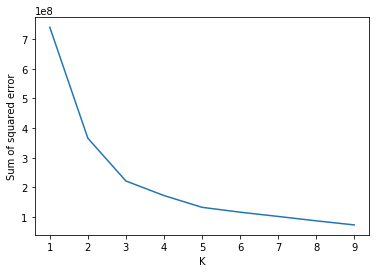

In [75]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### Preprocessing using min max scaler

In [76]:
scaler = MinMaxScaler()

scaler.fit(BRAND2[['ORIGINALPRICE']])
BRAND2['ORIGINALPRICE'] = scaler.transform(BRAND2[['ORIGINALPRICE']])

scaler.fit(BRAND2[['UNITPRICE']])
BRAND2['UNITPRICE'] = scaler.transform(BRAND2[['UNITPRICE']])

scaler.fit(BRAND2[['INVOICEDAMOUNT']])
BRAND2['INVOICEDAMOUNT'] = scaler.transform(BRAND2[['INVOICEDAMOUNT']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [77]:

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(BRAND2_feature)
y_predicted


array([2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [78]:
BRAND2['cluster']=y_predicted
BRAND2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ORIGINALPRICE,BRAND_x,UNITPRICE,INVOICEDAMOUNT,cluster
1289,0.255814,Brand B,0.197343,0.465946,2
1290,0.255814,Brand B,0.197343,0.000000,2
1291,0.651163,Brand B,0.102467,0.408217,2
1292,0.395349,Brand B,0.229602,0.610060,2
1293,0.395349,Brand B,0.229602,0.513339,2


In [79]:
km.cluster_centers_

array([[8015.        , 8009.73684211, 5243.51815789],
       [6366.25      , 6287.125     , 3993.323625  ],
       [6565.        , 2616.25      , 1398.6525    ]])

In [80]:
df1["BRAND_x"].groupby(df1["BRAND_x"],axis=0).count()


BRAND3=df1.iloc[1453:12883,:]
BRAND3.head()

,ORIGINALPRICE,BRAND_x,UNITPRICE,INVOICEDAMOUNT
1453,1990,Brand C,1990,1419.68
1454,1990,Brand C,1990,1435.86
1455,1990,Brand C,1990,1407.96
1456,1990,Brand C,1990,1395.65
1457,1990,Brand C,1990,1791.00


In [81]:
BRAND3_feature=BRAND3.loc[:, BRAND3.columns != 'BRAND_x']
BRAND3_feature.head()

,ORIGINALPRICE,UNITPRICE,INVOICEDAMOUNT
1453,1990,1990,1419.68
1454,1990,1990,1435.86
1455,1990,1990,1407.96
1456,1990,1990,1395.65
1457,1990,1990,1791.00


In [82]:
BRAND3_targ = BRAND3['BRAND_x']
BRAND3_targ.head()


1453    Brand C
1454    Brand C
1455    Brand C
1456    Brand C
1457    Brand C
Name: BRAND_x, dtype: object

In [83]:
BRAND3.head()


,ORIGINALPRICE,BRAND_x,UNITPRICE,INVOICEDAMOUNT
1453,1990,Brand C,1990,1419.68
1454,1990,Brand C,1990,1435.86
1455,1990,Brand C,1990,1407.96
1456,1990,Brand C,1990,1395.65
1457,1990,Brand C,1990,1791.00


## Elbow Plot

In [84]:

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(BRAND3_feature)
    sse.append(km.inertia_)
    

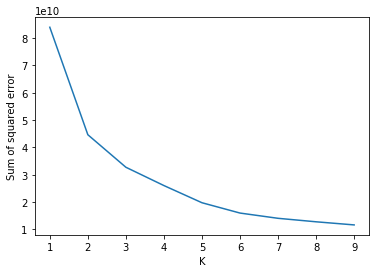

In [85]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### Preprocessing using min max scaler

In [86]:

scaler = MinMaxScaler()

scaler.fit(BRAND3[['ORIGINALPRICE']])
BRAND3['ORIGINALPRICE'] = scaler.transform(BRAND3[['ORIGINALPRICE']])

scaler.fit(BRAND3[['UNITPRICE']])
BRAND3['UNITPRICE'] = scaler.transform(BRAND3[['UNITPRICE']])

scaler.fit(BRAND3[['INVOICEDAMOUNT']])
BRAND3['INVOICEDAMOUNT'] = scaler.transform(BRAND3[['INVOICEDAMOUNT']])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [87]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(BRAND3_feature)
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [88]:

BRAND3['cluster']=y_predicted
BRAND3.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ORIGINALPRICE,BRAND_x,UNITPRICE,INVOICEDAMOUNT,cluster
1453,0.044586,Brand C,0.097222,0.114924,0
1454,0.044586,Brand C,0.097222,0.115198,0
1455,0.044586,Brand C,0.097222,0.114726,0
1456,0.044586,Brand C,0.097222,0.114518,0
1457,0.044586,Brand C,0.097222,0.121198,0


In [89]:
km.cluster_centers_

array([[3674.94358251, 1894.99312412, 1539.31839563],
       [4358.87176194, 3724.71076857, 3167.78450653],
       [6863.5050598 , 6486.23827047, 5849.04275069]])